<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-/blob/master/Time_Series_Analysis_Project_On_Champagne_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Time Series Forecasting - forecasting Champagne sales
In this notebook, I will use time series forecasting to forecast champagne sales. The sales data of champagnes of a company named 'Perrin Freres'.

Monthly sales are given in millions for 12 years. I have taken the sales values of the last year as the test data, and the data before that as the test data. I will build ARIMA and SARIMA models for this data.

The procedure is as follows:-

- Import the dataset.
- Build train and test set.
- Check stationarity in data.
- Make data stationary.
- Build models.
- Validate the model with test set.

Importing the required libraries.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_excel('/content/champagne.xlsx',parse_dates=True,squeeze=True,skiprows=12)

In [16]:
data.head()

,Month,Unnamed: 1,Unnamed: 2
0,1964-01-01,2815,NaN
1,1964-02-01,2672,NaN
2,1964-03-01,2755,NaN
3,1964-04-01,2721,NaN
4,1964-05-01,2946,NaN


In [17]:
data.drop(columns=['Unnamed: 2'],inplace=True)

In [18]:
data.head(1)

,Month,Unnamed: 1
0,1964-01-01,2815


In [19]:
data.columns = ['Dates','Sales']

In [20]:
data.head()

,Dates,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [21]:
data.shape

(105, 2)

In [22]:
data.isnull().sum()

Dates    0
Sales    0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   105 non-null    datetime64[ns]
 1   Sales   105 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [25]:
round(data.describe(),1)

,Sales
count,105.0
mean,4761.2
std,2553.5
min,1413.0
25%,3113.0
50%,4217.0
75%,5221.0
max,13916.0


In [26]:
data.set_index(data['Dates'],inplace=True)

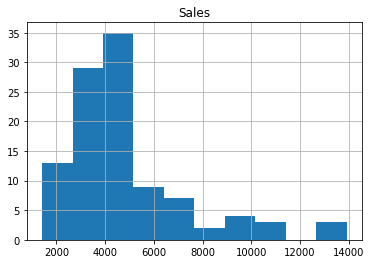

In [28]:
data.hist()
plt.show()

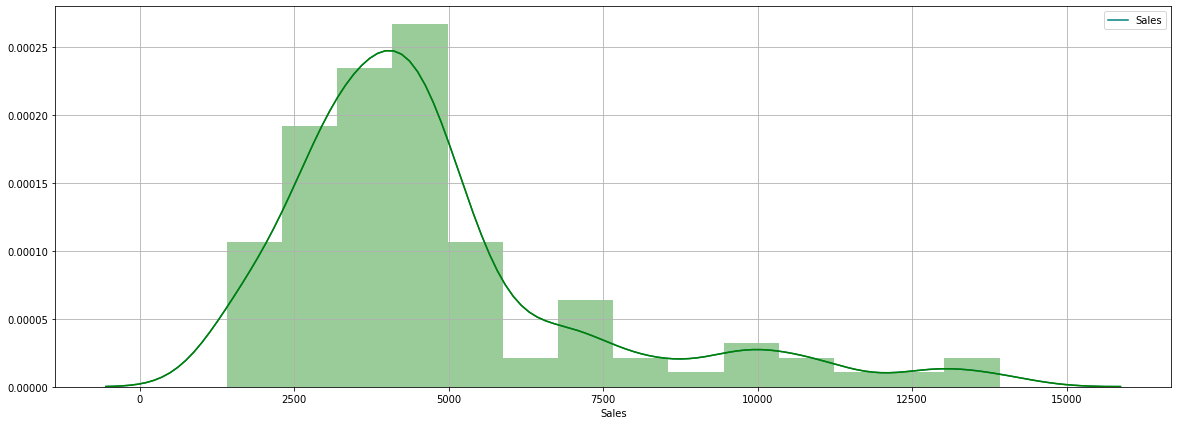

Skewness of the data :- 1.639003039912007
Kurtoisis of the data :- 2.7028889288455717


In [33]:
plt.figure(figsize=(20,7))
ax = sns.kdeplot(data['Sales'],color ='Teal')
sns.distplot(data['Sales'],color = 'g')
plt.grid()
plt.show()

print('Skewness of the data :-',data['Sales'].skew())
print('Kurtoisis of the data :-',data['Sales'].kurt())

Since the data is the right skewed as well as It conatains the large amount of the data inbetween the 2500 and 500.Here we can say that amount rupees in between 2500 and 5000 is max.

In [35]:
data.drop(columns=['Dates'],inplace=True)

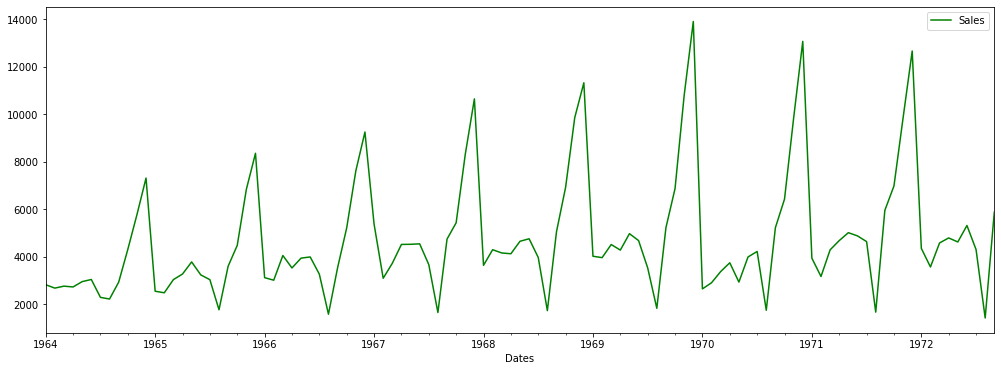

In [37]:
data.plot(color='g',figsize=(17,6))
plt.show()

Data seems like the seasonal data as well as It having some trend inside the data.

# Lets break the data in the Train and Test 

In [41]:
train_data =data[data.index.year != 1972]['Sales']
test_data = data[data.index.year==1972]['Sales']

In [42]:
train_data.shape,test_data.shape

((96,), (9,))

In [43]:
train_data.head()

Dates
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [44]:
test_data.head()

Dates
1972-01-01    4348
1972-02-01    3564
1972-03-01    4577
1972-04-01    4788
1972-05-01    4618
Name: Sales, dtype: int64

In [45]:
train_data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01', '1965-11-01', '1965-12-01',
               '1966-01-01', '1966-02-01', '1966-03-01', '1966-04-01',
               '1966-05-01', '1966-06-01', '1966-07-01', '1966-08-01',
               '1966-09-01', '1966-10-01', '1966-11-01', '1966-12-01',
               '1967-01-01', '1967-02-01', '1967-03-01', '1967-04-01',
               '1967-05-01', '1967-06-01', '1967-07-01', '1967-08-01',
               '1967-09-01', '1967-10-01', '1967-11-01', '1967-12-01',
               '1968-01-01', '1968-02-01', '1968-03-01', '1968-04-01',
               '1968-05-01', '1968-06-01', '1968-07-01', '1968-08-01',
      

In [46]:
test_data.index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01'],
              dtype='datetime64[ns]', name='Dates', freq=None)

# Time series plot and stationarity
Let us plot the time series for an initial analysis.

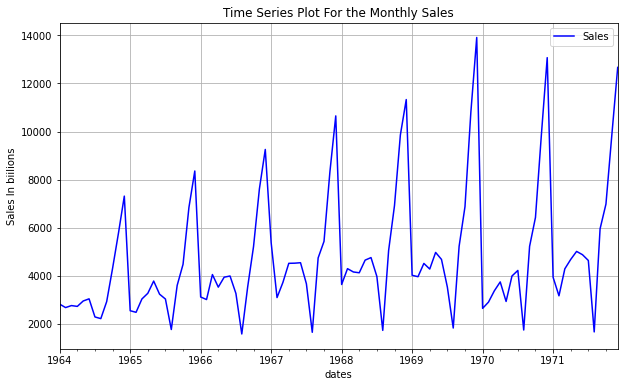

In [47]:
train_data.plot(kind ='line',figsize=(10,6),color='b')
plt.legend()
plt.ylabel('Sales In biilions')
plt.xlabel('dates')
plt.grid()
plt.title('Time Series Plot For the Monthly Sales')
plt.show()


We can see that there is seasonality in the data, with the peaks repeating themselves. Also the peaks are getting higher and higher every year.

Let us decompose the plot into trend, seasonality and residuals

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

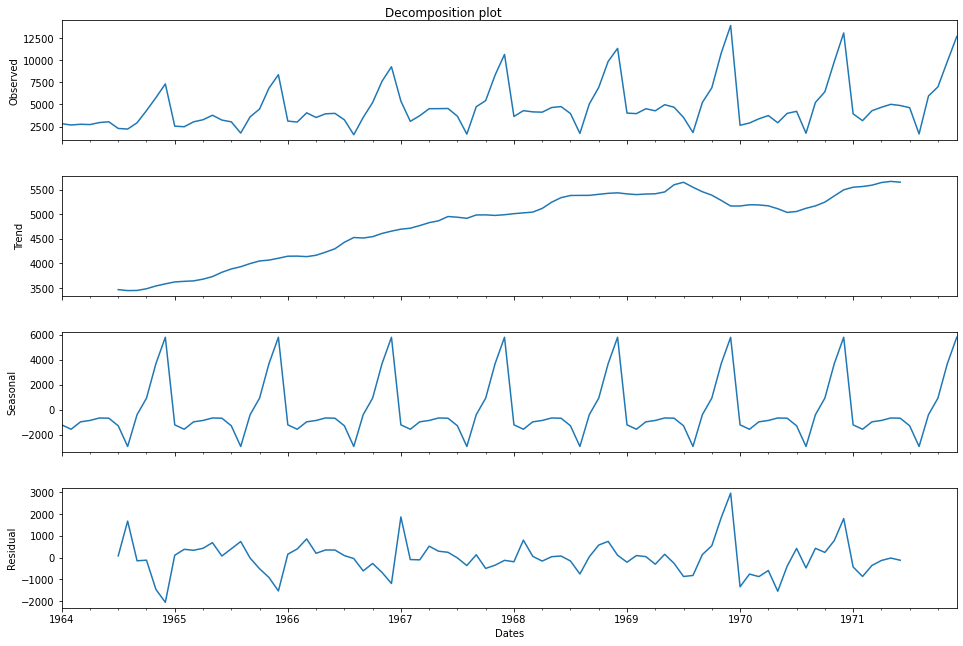

In [53]:
decomposition = seasonal_decompose(train_data, model='additive', freq = 12)
fig = decomposition.plot()
fig.set_size_inches(15,10)
fig.suptitle('Decomposition plot')
plt.show()

- We can clearly see the seasonality in the data. There looks like there is some trend as well. The residual is also not at all constant. We want to make the series stationary. We can check the stationarity by using the rolling mean as well as using the Dicky Fuller hypothesis test.

- The Dicky Fuller test assumes in the null hypothesis that the series is non-stationary. If the test statistic is less than the critical value then the null is rejected and the series is staitonary, else the series is non statonary and we need to use transformations to make the series stationary.

I am going develope some function for the plot for data rolling and Dicky Fuller Test.

In [59]:
def set_plot(ser,window):
  rolling_series_mean = ser.rolling(window=window).mean()
  roling_series_std  = ser.rolling(window=window).std()
  print('Plots For the mean Rolling & std Rollling.' )
  plt.figure(figsize = (8,5))
  ser.plot()
  rolling_series_mean.plot(color='g',label='Rolling mean')
  roling_series_std.plot(color ='r',label='Rolling std')
  plt.legend()
  plt.grid()
  plt.ylabel('Sales In millions')
  plt.show()

In [62]:
def is_stationary(ser):
  from statsmodels.tsa.stattools import adfuller
  result = adfuller(ser,regression='c', autolag='AIC')
  if result[1] >=0.05:
    print('This is accepting the null hypothesis.It means it is the Non-Stationary data.')
  else:
    print('This is accepting the Alternate hypothesis.It means it is the Stationary data')

Plots For the mean Rolling & std Rollling


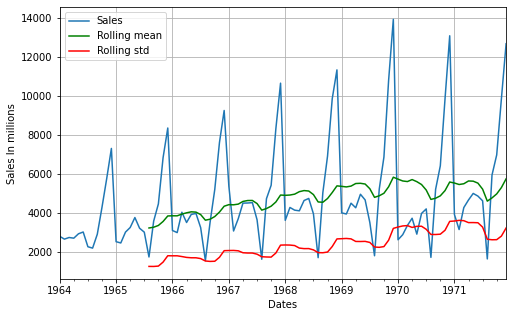

In [60]:
set_plot(train_data,20)

In [63]:
is_stationary(train_data)

This is accepting the null hypothesis.It means it is the Non-Stationary data.


The test shows that the test statistic is greater than the 1% value. This shows that we cannot reject the null hypothesis and the series is non-stationary.

Now we will make the series stationary. Since the series has seasonality which is quite clearly visible, we can remove the seasonality by shifting the series by 12 and subtracting it from the orignal series.

# Differencing the data.

In this data we are going to use diffrencing of 12.In order to make it Stationary.
Becasue It containing the trend so we are goinng to remove it.

In [66]:
sales_diff = train_data - train_data.shift(12)

In [68]:
sales_diff

Dates
1964-01-01      NaN
1964-02-01      NaN
1964-03-01      NaN
1964-04-01      NaN
1964-05-01      NaN
              ...  
1971-08-01    -79.0
1971-09-01    730.0
1971-10-01    557.0
1971-11-01      9.0
1971-12-01   -406.0
Name: Sales, Length: 96, dtype: float64

Plots For the mean Rolling & std Rollling


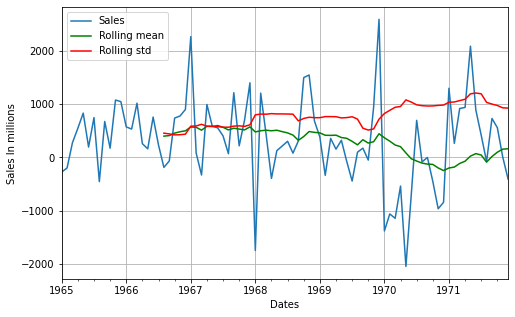

In [69]:
sales_diff.dropna(inplace=True)
set_plot(sales_diff,20)

In [70]:
is_stationary(sales_diff)

This is accepting the Alternate hypothesis.It means it is the Stationary data


Now we have completely removed the seasonality of the data and make it stationary data.

Now that we have removed the stationarity from our time series, we can make the ACF(Auto-correlation function) and PACF(Partial Auto-correlation function) plots which will help us decide the parameters of our Arima model.

In [75]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,acf,pacf

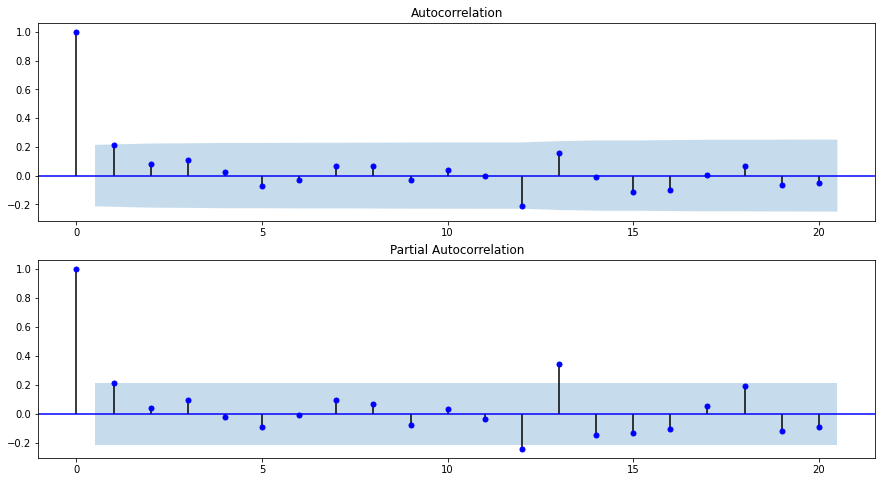

In [77]:
plt.figure(figsize = (15,8))
plt.subplot(211)
plot_acf(sales_diff, ax=plt.gca(), color ='blue')
plt.subplot(212)
plot_pacf(sales_diff, ax=plt.gca(),  color ='blue')
plt.show()

As you can see, that there are only a few significant values in both the ACF and the PACF. Both the PACF and ACF drop off suddenly, perhaps suggesting a mix of AR and MA models. All this is insignificant for us as we will try a bunch of different parameters and choose the one with lower RMSE(root mean square error).

We define a function to take the seasonal difference for a series to remove the seasonality.

#  Building models
We will now build our ARIMA model. First we import the required class.

From the above we can see there is some order we required that are P,D,Q:
- P values is can determine with the Auto_correlation plot.The p=1 because after 0 there is only 1 avalible which is not critiical rigion as well as It is providing the autocorrelation.
- D here is the 12 because during period of the diffrencing we have shifted by sales 12 months according to seasonality.
- Q is determine with the help of the graph of partial auto-correlation.It is helping to get the of the q=1 becasue It is providing correlation as well as It is quite outside the critical rigion.



In [155]:
def inverse_seas_diff(original, value, interval):
    return value + original.iloc[-interval]

def make_seas_diff(original, interval):
    seasonal_diff_ts = original - original.shift(interval)
    seasonal_diff_ts.dropna(inplace  =True)
    return list(seasonal_diff_ts)

In [156]:
from statsmodels.tsa.arima_model import ARIMA

In [159]:
def rmse(order):
    
    train_list = list(train_data)
    predictions = []
    for index,true_value in test_data.iteritems(): 
        seasonal_diff_ts = make_seas_diff(pd.Series(train_list),12)
        model = ARIMA(sales_diff, order=order)
        results_AR = model.fit(trend = 'nc',disp=0)
        pred = results_AR.forecast()[0][0]
        pred = inverse_seas_diff(pd.Series(train_list),pred,12)
        train_list.append(true_value)
        predictions.append(pred)

    return ('RMSE: ', mean_squared_error(list(test_data), predictions) ** 0.5)

We will try all possible combinations of parameters for (p,d,q) and then compute rmses for each combination. For some of the combinations the underlying code in the library will give errors due to mathematical operations. We will skip those.

In [160]:
import itertools
p = range(0,5)
d = range(0,3)
q = range(0,5)
combinations = list(itertools.product(p,d,q))

for parameter in combinations:
    try:
        order = parameter
        print(order,':', rmse(order))
    except:
        continue

(0, 1, 1) : ('RMSE: ', 371.3421505580174)
(0, 1, 2) : ('RMSE: ', 322.84923408052816)
(0, 2, 1) : ('RMSE: ', 567.9857360151408)
(1, 1, 0) : ('RMSE: ', 439.0874962466034)
(1, 1, 1) : ('RMSE: ', 321.0937445165723)
(1, 1, 2) : ('RMSE: ', 328.6584932825273)
(1, 1, 3) : ('RMSE: ', 330.90492922163696)
(1, 2, 0) : ('RMSE: ', 1020.623592768478)
(1, 2, 3) : ('RMSE: ', 334.4388026598094)
(2, 1, 0) : ('RMSE: ', 325.69213458797526)
(2, 1, 1) : ('RMSE: ', 326.46554394031443)
(2, 1, 2) : ('RMSE: ', 318.5296265865384)
(2, 1, 3) : ('RMSE: ', 342.3689047816946)
(2, 2, 0) : ('RMSE: ', 880.4817524551557)
(2, 2, 1) : ('RMSE: ', 325.200659506798)
(2, 2, 2) : ('RMSE: ', 326.08339694529826)
(3, 1, 0) : ('RMSE: ', 319.7479701257434)
(3, 1, 1) : ('RMSE: ', 334.84216331599345)
(3, 1, 2) : ('RMSE: ', 334.1869387954156)
(3, 2, 0) : ('RMSE: ', 456.27373071477524)
(3, 2, 1) : ('RMSE: ', 319.47647223196856)
(4, 1, 0) : ('RMSE: ', 318.4388762953346)
(4, 1, 1) : ('RMSE: ', 333.3062867804412)
(4, 1, 2) : ('RMSE: ', 318.

RMSE:  371.3421505580174


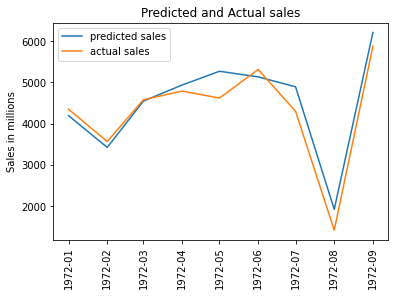

In [165]:
train_list = list(train_data)
predictions = []
for index,true_value in test_data.iteritems(): 
  seasonal_diff_ts = make_seas_diff(pd.Series(train_list),12)
  model = ARIMA(sales_diff, order=(0,1,1))
  results_AR = model.fit(trend = 'nc',disp=0)
  pred = results_AR.forecast()[0][0]
  pred = inverse_seas_diff(pd.Series(train_list),pred,12)
  train_list.append(true_value)
  predictions.append(pred)



print ('RMSE: ', mean_squared_error(list(test_data), predictions) ** 0.5)

pred_series =  pd.Series(predictions, index = test_data.index)
plt.plot(pred_series, label = 'predicted sales')
plt.plot(test_data, label = 'actual sales')
plt.xticks(rotation = 'vertical')
plt.ylabel('Sales in millions')
plt.title('Predicted and Actual sales')
plt.legend()


By plotting the actual and predicted values for the last 9 months in the test set we can see that the predicted sales match the actual sales in the last 9 months quite well.

Let us go a step ahead and build a Seasonal-ARIMA or SARIMA model. In this model we specify additional parameters (P,D,Q,m) for modelling the seasonality along with the general parameters (p,d,q). 'm' stands for the number of periods for which the seasonality exists.

As we are building a seasonal-ARIMA model we don't need to remove the seasonality. Let us choose P=0, D=1, Q=1 and m is 12.

In [166]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

RMSE:  328.8814673792395


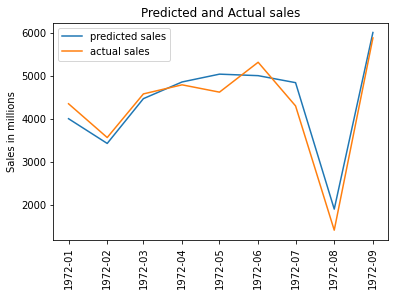

In [167]:
train_list = list(train_data)
predictions = []
for index,true_value in test_data.iteritems(): 
    model = SARIMAX(train_list, trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))
    results_AR = model.fit(trend = 'nc',disp=0)
    pred = results_AR.forecast()[0]
    train_list.append(true_value)
    predictions.append(pred)

print ('RMSE: ', mean_squared_error(list(test_data), predictions) ** 0.5)
pred_series =  pd.Series(predictions, index = test_data.index)
plt.plot(pred_series, label = 'predicted sales')
plt.plot(test_data, label = 'actual sales')
plt.xticks(rotation = 'vertical')
plt.ylabel('Sales in millions')
plt.title('Predicted and Actual sales')
plt.legend()


As we can see that the RMSE is lower than the ARIMA model and the plot also shows that the predicted and actual sales match upto quite an extent.